In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

/home/sarisadiya/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


Get the sklearn digit recognition toy dataset, it contains 569 cases.
We then take the first 500 to be our training set and the last 69 for testing

In [4]:
# load the data set
img,label=sklearn.datasets.load_breast_cancer(return_X_y=True)
# split the data set
TRAIN_SIZE = 500
label = 2*label-1
train_img,test_img = img[:TRAIN_SIZE], img[TRAIN_SIZE:]
train_label,test_label = label[:TRAIN_SIZE], label[TRAIN_SIZE:]

/home/sarisadiya/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
/home/sarisadiya/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

In [5]:
# Perceptron Class
class Perceptron(object):
    # Initialize the perceptron
    def __init__(self, dim_input=30, dim_out=2, learning_rate=1):
        self.w = np.zeros(dim_input)
        self.dim_input = dim_input # dimension of the input (30 for our medical cases)
        self.learning_rate = learning_rate
    
    def predict(self,input_array):
        # See the "Perceptron learning rule" slides: w * x
        z = np.matmul(input_array,self.w)
        if z == 0:
             return 1
        return np.sign(z)
        
    def one_update(self,input_array,label):
        y = self.predict(input_array)
        # Updates, see the "Deep Learning: Perceptron" slides
        # Your code goes here!
        if y == label:
            # complete!
        else:
            # complete!
        # Don't return anything, change the class variable instead!
                    
    def train(self, training_inputs, labels):
        # for every img label pair in the training set
        # perform an update to perceptron
        for input_array,label in zip(training_inputs,labels):
            self.one_update(input_array,label)
    
    def test(self, testing_inputs, labels):
        # number of correct predictions
        count_correct = 0
        # a list of the predicted labels the same order as the input 
        pred_list = []
        for test_array, label in zip(testing_inputs,labels):
            prediction = perceptron.predict(test_array)
            if prediction == label:
                count_correct += 1
            pred_list.append(prediction)
        accuracy = float(count_correct)/len(test_label)
        print('Accuracy is '+str(accuracy))
        return np.asarray(pred_list)

In [6]:
# Number of epochs (iterations over the training set)
NUM_EPOCH = 6

In [7]:
# Try the perceptron with sigmoid activation
perceptron = Perceptron(learning_rate=1)
for ii in range(NUM_EPOCH):
    perceptron.train(train_img,train_label)
print('For sigmoid activation and '+str(NUM_EPOCH)+' epochs')
pred_array = perceptron.test(test_img,test_label)

For sigmoid activation and 6 epochs
Accuracy is 0.9420289855072463


In [13]:
train_label[1:100]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
        1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1])

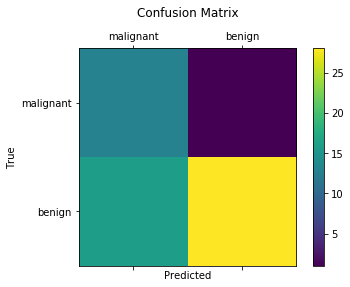

In [489]:
# Confusion matrix shows what we predicted vs what was the real (True) label.
# A perfect classifier will have has non zero elements only in the diagonal (why??)
# Look at the results outside the diagonal, does it make sense that these mistakes happened?
confusion_mat = confusion_matrix((test_label+1)/2, (pred_array+1)/2, labels=range(0,2))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(confusion_mat)
plt.title('Confusion Matrix\n')
fig.colorbar(cax)
labels = ['malignant', 'benign']
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [490]:
confusion_mat

array([[13,  1],
       [16, 28]])

# Extra Credit!!!
The same simple rule can be applied to multiple classes, update your code to work with any number of classe!

In [11]:
# load the data set
# This is handwritten digit recognition
img,label=sklearn.datasets.load_digits(return_X_y=True)
TRAIN_SIZE = 1700
# split the data set
train_img,test_img = img[:TRAIN_SIZE], img[TRAIN_SIZE:]
train_label,test_label = label[:TRAIN_SIZE], label[TRAIN_SIZE:]

As can be observed, each of these train img is an 8x8 pixel grayscale image of a handwritten digit, 
for instance training image number 47 is of the handwritten digit '1'. 
We can also verify that the label in the dataset is indeed 1.

In [12]:
IMG_DIM = (8,8)

label in the dataset is 2


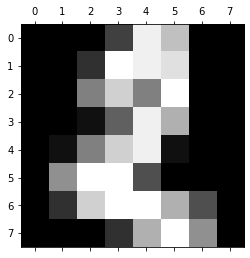

In [13]:
# Try it yourself with any index!
img_idx = 2
plt.matshow(np.reshape(train_img[img_idx],IMG_DIM),cmap='gray')
print('label in the dataset is '+str(train_label[img_idx]))

In [19]:
perceptron = Perceptron(dim_input=8*8, dim_out=10)
for ii in range(NUM_EPOCH):
    perceptron.train(train_img,train_label)
print('For linear activation and '+str(NUM_EPOCH)+' epochs')
pred_array = perceptron.test(test_img,test_label)

For linear activation and 6 epochs
Accuracy is 0.9381443298969072


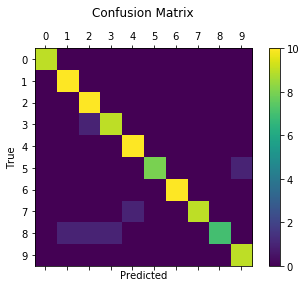

In [20]:
#########################################################################################
# Confusion matrix shows what we predicted vs what was the real (True) label.
# A perfect classifier will have has non zero elements only in the diagonal (why??)
# Look at the results outside the diagonal, does it make sense that these mistakes happened?
confusion_mat = confusion_matrix(test_label, pred_array, labels=range(0,10))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(confusion_mat)
plt.title('Confusion Matrix\n')
fig.colorbar(cax)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
# Note the perceptron seems to have misclassified some 3s as 8s, these digits do look similar  
# so this is to be expected.. what else did we misclassify?